## Model the CEF phonon coupling in KCeO2

Allen Scheie, Danny Rehn, Sabrina Li

April, 2025

Based off this paper by Mitchell https://doi.org/10.1103/PhysRevB.104.094421 , eigenvectors at 118.8, 146.2, and 170 meV.
This gives energy differences of 51.2 meV and 27.4

## TODO: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import PyCrystalField as cef
from copy import deepcopy
import pylib.plotformat as pf

import matplotlib.gridspec as gridspec
from matplotlib.colors import Normalize

import yaml

 *******************************************************
 *                PyCrystalField 2.3.11               *
 *  Please cite  J. Appl. Cryst. (2021). 54, 356-362   * 
 *    <https://doi.org/10.1107/S160057672001554X>      *
 *******************************************************



In [2]:
ciffile = 'KCeO2.cif'
# ciffile = 'DFT_kceo2-phonons-2/tdispmat.cif'
CeLig0, Ce = cef.importCIF(ciffile, 'Ce', NumIonNeighbors=2) # Generates point charge model
CeLig1, Ce = cef.importCIF(ciffile, 'Ce', NumIonNeighbors=2) # Generates point charge model 

LigandCharges = [-1.95,1]
# LigandCharges = [-1.73,0.5]
# LigandCharges = [-1.83,1.6]
symequivlabels = [0]*6 + [1]*6  ## This must be set by hand
Ce = CeLig0.PointChargeModel(symequiv = symequivlabels, LigandCharge=LigandCharges)
print(CeLig0.CentralIonPos)

unit cell: 3.65861 3.65861 18.58608 90.0 90.0 120.0
Importing atoms
   12 atoms added
.cif import complete.
Central ion: Ce3+ at [0.0, 0.0, 0.0]
    AAAH! There is a super-close atom. Removing it...
 Nearest ligand: O2-
 Next Nearest ligand: Ce3+
   Identified 6 O2- ligands.
   Identified 6 Ce3+ ligands.
   Found 3 fold axis about [0. 0. 2.]
   Found mirror plane: [1. 0. 0.]

  Axes for point charge model (in ABC space):
        X axis = [-0.5 -1.   0. ] 
        Y axis = [1. 0. 0.] 
        Z axis = [0. 0. 1.] 

   Creating a point charge model...
B_2 0  =  -5.45278484
B_2 1  =  -1.4e-07
B_2 2  =  1e-08
B_4 0  =  -0.23835377
B_4 1  =  -0.0
B_4 2  =  0.0
B_4 3  =  7.83773006
B_4 4  =  0.0
B_6 0  =  0.0
B_6 1  =  -0.0
B_6 2  =  -0.0
B_6 3  =  -0.0
B_6 4  =  0.0
B_6 5  =  -0.0
B_6 6  =  0.0
unit cell: 3.65861 3.65861 18.58608 90.0 90.0 120.0
Importing atoms
   12 atoms added
.cif import complete.
Central ion: Ce3+ at [0.0, 0.0, 0.0]
    AAAH! There is a super-close atom. Removing it...
 

In [3]:
########### print eigenvectors
Ce.printEigenvectors() 
print(CeLig0.bonds)
print(CeLig0.LatticeTransformM)


 Eigenvalues 	 Eigenvectors
		-------------------------------------------------
0.00000 	|  [-0.484  0.     0.    -0.875 -0.    -0.   ]  |
0.00000 	|  [-0.     0.    -0.875 -0.     0.     0.484]  |
126.58166 	|  [-0.    -0.339  0.    -0.     0.941  0.   ]  |
126.58166 	|  [-0.     0.941  0.     0.     0.339 -0.   ]  |
171.08294 	|  [ 0.    -0.    -0.484 -0.     0.    -0.875]  |
171.08294 	|  [ 0.875  0.     0.    -0.484  0.     0.   ]  |
		-------------------------------------------------

[[ 2.11229947  0.          1.18845591]
 [-2.11229947  0.         -1.18845591]
 [ 1.05614973 -1.829305   -1.18845591]
 [ 1.05614973  1.829305   -1.18845591]
 [-1.05614973 -1.829305    1.18845591]
 [-1.05614973  1.829305    1.18845591]
 [ 3.1684492   1.829305    0.        ]
 [-3.1684492  -1.829305    0.        ]
 [ 3.1684492  -1.829305    0.        ]
 [-3.1684492   1.829305    0.        ]
 [ 0.         -3.65861     0.        ]
 [ 0.          3.65861     0.        ]]
[[ 0. -1.  0.]
 [ 1.  0.  0.]
 [ 0.

## Now import DFT results

In [4]:
### Import the DFT results if not already imported
try:
    dft_eigenvectors  #check if exists
except NameError:
    dftyamlfile = 'DFT-kceo2-phonons-final/kceo2-final/kceo2-final/band.yaml'
    with open(dftyamlfile, 'r') as file:
        dft_eigenvectors = yaml.safe_load(file)

In [5]:
## Figure out the rotation matrix to go from the DFT calculated unit cell
## to the CIF unit cell (which includes all the symmetries)
UnitCell_RotationMatrix = np.linalg.inv(np.array([[1,-1,0],[0,1,-1],[1,1,1]]).T)
## Lattic transformation matrix of the CIF unit cell
latticmatrix2 = np.array([[3.658610105500000, 0.000000000000000,  0.000000000000000 ],
                        [-1.829305052800000, 3.168449293900000,  0.000000000000000 ],
                        [ 0.000000000000000, 0.000000000000000,  18.586080551100000 ]]).T
latM2 = np.dot(latticmatrix2, UnitCell_RotationMatrix)

# Test it out
Opos = np.array(dft_eigenvectors['points'][3]['coordinates'])
print(np.dot(UnitCell_RotationMatrix,Opos))

shifts = np.array([[i,j,k] for i in range(-1,2) for j in range(-1,2) for k in range(-1,2)])

print(np.repeat(np.arange(4),4))

[2.77555756e-17 4.16333634e-17 2.69389987e-01]
[0 0 0 0 1 1 1 1 2 2 2 2 3 3 3 3]


In [6]:

# Phonopy constants:
KB_J = 1.3806504e-23
PlanckConstant = 4.13566733e-15 #[eV s]
Avogadro = 6.02214179e+23
SpeedOfLight = 299792458 #[m/s]
AMU = 1.6605402e-27 #[kg]
EV = 1.60217733e-19 #[J]
Me = 9.10938215e-31 #[kg]
THz = 1e12 #[/s]
Angstrom = 1e-10 #[m]
Newton = 1.0 #[kg m / s^2]
Joule = 1.0 #[kg m^2 / s^2]
Hbar = 6.582118985531608e-16 #[eV s]
Epsilon0 = 8.85418781762039e-12  #[C^2 / N m^2]
Bohr = 0.529177207423948  #[A]
Hartree = 27.211398230887998  #[eV]
Rydberg = 13.605699115443999  #[eV]
THzToEv = 0.00413566733  #[eV]
KB = 8.617338256808316e-05  #[eV/K]
THzToCm = 33.3564095198152  #[cm^-1]
CmToEv = 0.00012398418743309975  #[eV]
EVAngstromToGPa = 160.21773299999998  #[GPa]
EvTokJmol = 96.4853905398362  #[kJ/mol]
DefaultToTHz = 15.633302300230191  #[THz]


prefactor = Hbar *EV/(Angstrom**2*1e12*2*np.pi) * (1/2) 


def bose_n(freq, temp):
    occ = 1/(np.exp(Hbar*2*np.pi*freq*THz/(KB*temp)) - 1)
    return occ

def UCart_DR(dynmatfile, T, Ncells=1):
    # It turns out Ncells is not used/not needed.
    #  => I think this is due to the fact that the mesh is used directly for normalization
    #     But it's a little weird because the documentation doesn't quite agree with the source code
    
    # Open the mesh.yaml file (preferred over band.yaml)
    with open(dynmatfile, 'r') as file:
        dft = yaml.safe_load(file)

    # This is the prefactor used in Phonopy:
    prefactor = Hbar *EV/(Angstrom**2*1e12*2*np.pi) * (1/2) # the final 1/2 comes from the 1/2 in the formula
    print("prefactor = ", prefactor)

    # Number of q points (note this neglects the weight of each point at this point):
    nqq = dft['nqpoint']

    # Number of atoms in the cell
    nat = dft['natom']

    # Number of frequencies (nu)
    nnu = len(dft['phonon'][0]['band'])  # number of frequencies at each q

    # mean squared displacement matrices (3x3 matrix for each atom):
    ms_disp = np.zeros([nat,3,3])

    print('mesh size = ', nqq, ';  # atoms = ', nat, '; # freqs (nu) = ', nnu)

    wsum = 0
    for qqi in range(nqq):
        weight = dft['phonon'][qqi]['weight']
        wsum += weight
        for nu in range(nnu):
            
            # Compute population factor
            energy = dft['phonon'][qqi]['band'][nu]['frequency'] #  leave in THz (to be consistent with phonopy)
            n_bos = bose_n(energy, T)

            for ati in range(nat):
                mj = dft['points'][ati]['mass']*AMU
                evec = np.array(dft['phonon'][qqi]['band'][nu]['eigenvector'][ati])[:,0] +\
                       np.array(dft['phonon'][qqi]['band'][nu]['eigenvector'][ati])[:,1]*1j

                ms_disp[ati,:,:] += prefactor/mj*(1 + 2*n_bos)/energy*np.real(np.outer(evec,evec.conj()))*weight
                
                # ms_disp[ati,:,:] += prefactor/mj/energy*np.real(np.outer(evec,evec.conj()))*weight

    ms_disp /= wsum

    return ms_disp.real
    # return np.sqrt(ms_disp.real)

print(np.diagonal(UCart_DR('./DFT-normaliztaion/2025.04.30-kceo2/primitive/mesh.yaml',
                            T=5),axis1=1,axis2=2))
print(np.diagonal(UCart_DR('./DFT-normaliztaion/2025.04.30-kceo2/conventional/mesh.yaml',
                            T=5),axis1=1,axis2=2))
print(bose_n(4,300))

prefactor =  8.392018782201996e-28
mesh size =  10 ;  # atoms =  4 ; # freqs (nu) =  12
[[0.00139931 0.00101022 0.00105009]
 [0.00282494 0.00361984 0.00371817]
 [0.0035902  0.0035327  0.00357306]
 [0.0035902  0.0035327  0.00357306]]
prefactor =  8.392018782201996e-28
mesh size =  20 ;  # atoms =  12 ; # freqs (nu) =  36
[[0.0008895  0.00091953 0.00141217]
 [0.0008895  0.00091953 0.00141217]
 [0.0008895  0.00091953 0.00141217]
 [0.00357819 0.00359372 0.00282785]
 [0.00357819 0.00359372 0.00282785]
 [0.00357819 0.00359372 0.00282785]
 [0.00338657 0.0034215  0.00359316]
 [0.00338657 0.0034215  0.00359316]
 [0.00338657 0.0034215  0.00359316]
 [0.00338657 0.0034215  0.00359316]
 [0.00338657 0.0034215  0.00359316]
 [0.00338657 0.0034215  0.00359316]]
1.1157119621081915


#### Getting the displacement units right:

The above calculation is approximately equal to the thermal_displacement_matrices.yaml file.  https://phonopy.github.io/phonopy/formulation.html#thermal-displacement 

This means that we must multiply each displacement by the square root of the prefactor divided by the atomic mass, or 
$$
u = \sqrt{\frac{\hbar^2}{2 N m_j (\hbar \omega(q))}}
$$

In [7]:
################## My own prefactor starting from S.H.O:
THzTomeV = 4.1357
kB = 8.617333262e-2 #meV/K
hbar = 6.582119569e-13 # meV*s
JouleTomeV = 6.241509e21 # meV/J
amuToKg = 1.660539e-27 # kg/amu
aaperm = 1e10 # \AA /m 

prefactor = hbar**2 / (2* amuToKg * JouleTomeV) *(aaperm**2)
print('prefactor:', np.sqrt(prefactor))


class DFT_phonon_CEF:
    def __init__(self, dftoutput, cefLigand):
        self.Lig = cefLigand
        self.natom = dftoutput['natom']

        ## Step 1: match the bonds to the atoms
        # latticmatrix = np.array(dftoutput['lattice']).T  ## Doesn't work if the unit cells don't match
        latticmatrix = latM2
        self.latM = np.dot(self.Lig.LatticeTransformM, latticmatrix) ## transform from ABC space to bond cartesian space
        self.CartRotMat = np.dot(self.latM, np.linalg.inv(np.array(dftoutput['lattice']).T))  ## Rotate from one cartesian
                                                                                            ## axis to another
        # self.latM = latticmatrix*1.0 ## transform from ABC space to bond cartesian space
        self.latMinv = np.linalg.inv(self.latM) ## transform from ABC space to cartesian space

        self.pointsABC = np.array([dftoutput['points'][ii]['coordinates'] 
                                    for ii in range(dftoutput['natom'])])
        # print([pp + shifts for pp in self.pointsABC])
        self.pointsABC = np.vstack([pp + shifts for pp in self.pointsABC])
        self.pointsCART = np.array([np.dot(self.latM, pp) 
                                    for pp in self.pointsABC])

        pointslist = np.repeat(np.arange(dftoutput['natom']),len(shifts))
        
        ## Match the central ion to a point vector
        centralIon_index = pointslist[np.all(np.around((self.pointsABC - self.Lig.CentralIonPos),5) == 0, axis=1)]
        self.centralIon_index = centralIon_index[0]
        print('central ion index:', self.centralIon_index, dftoutput['points'][self.centralIon_index])

        # print(self.pointsCART)
        # ## Loop through bonds and match bonds to pointsCART
        self.bond_indices = []
        self.bond_masses = []
        for i,b1 in enumerate(cefLigand.bonds):
            b_abc = np.dot(self.latMinv, b1)
            bbb = self.pointsABC - self.Lig.CentralIonPos
            dd = np.around((bbb - b_abc),6)

            index = pointslist[np.all((dd == 0) + (dd == 1) + (dd == -1), axis=1)]
            self.bond_indices.append(index[0])
            self.bond_masses.append(dftoutput['points'][index[0]]['mass'])

        ### Calculate prefactor to phonon displacements 



    def computedistortion(self, band, displacement=1.0):
        '''band comes from the DFT file: eg dft_eigenvectors['phonon'][0]['band'][3]'''
        newbonds = deepcopy(self.Lig.bonds)
        bandevs = np.array(band['eigenvector'])[:,:,0]   ## Discard the imaginary part

        ci_eev = bandevs[self.centralIon_index] # eigenvector of central ion displacement

        energy = band['frequency']* THzTomeV # leave in frequency

        for i,b1 in enumerate(self.Lig.bonds):
            if energy > 1e-3:
                # amplitude = np.sqrt(prefactor/(self.bond_masses[i]* energy))
                amplitude = np.sqrt(prefactor/(self.bond_masses[i]* energy)) * (1+2)  # Multiply by 3 for a single phonon
                # amplitude = np.sqrt(self.natom*prefactor/(self.bond_masses[i]* energy))
                # print('amplitude:', amplitude)
            else: amplitude = 0
            eev = bandevs[self.bond_indices[i]]
            # newbonds[i] = b1 + displacement*(np.dot(self.latM, eev) - np.dot(self.latM, ci_eev) )  # Assumes ABC vectors
            newbonds[i] = b1 + amplitude*displacement*(np.dot(self.CartRotMat, eev) -\
                                              np.dot(self.CartRotMat, ci_eev))  # Assumes cartesian vectors
        return newbonds
    

    def PhononOperator(self, band, displacement = 1.0, printB=False):
        newbonds = self.computedistortion(band, displacement)
        CeLig1.bonds = newbonds 
        CeEE = CeLig1.PointChargeModel(symequiv = symequivlabels, LigandCharge=LigandCharges, printB=printB)
        return CeEE.H - Ce.H 
        


KCO_dftcef = DFT_phonon_CEF(dft_eigenvectors, CeLig0)
print('Rotation matrix =', np.around(KCO_dftcef.CartRotMat,5))
print(np.around(np.dot(KCO_dftcef.CartRotMat, np.array([1,0,0])),5))
print(np.around(np.dot(KCO_dftcef.CartRotMat, np.array([0,1,0])),5))
print(np.around(np.dot(KCO_dftcef.CartRotMat, np.array([0,0,1])),5))
print(KCO_dftcef.bond_indices)
print(KCO_dftcef.bond_masses)

print(KCO_dftcef.Lig.bonds)
print(KCO_dftcef.computedistortion(dft_eigenvectors['phonon'][0]['band'][3], displacement=3))

prefactor: 1.4457108117630635
central ion index: 0 {'symbol': 'Ce', 'coordinates': [0.0, 0.0, 0.0], 'mass': 140.116}
Rotation matrix = [[-0.16805 -0.       0.98578]
 [-0.      -1.       0.     ]
 [ 0.98578  0.       0.16805]]
[-0.16805 -0.       0.98578]
[-0. -1.  0.]
[0.98578 0.      0.16805]
[2, 3, 3, 3, 2, 2, 0, 0, 0, 0, 0, 0]
[15.9994, 15.9994, 15.9994, 15.9994, 15.9994, 15.9994, 140.116, 140.116, 140.116, 140.116, 140.116, 140.116]
[[ 2.11229947  0.          1.18845591]
 [-2.11229947  0.         -1.18845591]
 [ 1.05614973 -1.829305   -1.18845591]
 [ 1.05614973  1.829305   -1.18845591]
 [-1.05614973 -1.829305    1.18845591]
 [-1.05614973  1.829305    1.18845591]
 [ 3.1684492   1.829305    0.        ]
 [-3.1684492  -1.829305    0.        ]
 [ 3.1684492  -1.829305    0.        ]
 [-3.1684492   1.829305    0.        ]
 [ 0.         -3.65861     0.        ]
 [ 0.          3.65861     0.        ]]
[[ 1.80515392 -0.17733056  1.18845591]
 [-2.41944501 -0.17733056 -1.18845591]
 [ 0.7490041

In [8]:
## A single band at Q=0:
qqi =2
dft_eigenvectors['phonon'][qqi]['band'][3]

nphons = len(dft_eigenvectors['phonon'][0]['band'])

PhononOO = [np.zeros_like(Ce.H)] # Operator Hamiltonian (start with zero for uncoupled solution)
PhononBB = [0] # Stevens Operators
PhononEE = [0] # Energies
for i in range(nphons):
    energy = dft_eigenvectors['phonon'][qqi]['band'][i]['frequency'] * THzTomeV
    OO1 = KCO_dftcef.PhononOperator(dft_eigenvectors['phonon'][qqi]['band'][i], displacement = 1.0)
    Bph1 = CeLig1.B - CeLig0.B
    PhononOO.append(OO1)
    PhononBB.append(Bph1)
    PhononEE.append(energy)

### Build the new Hamiltonian

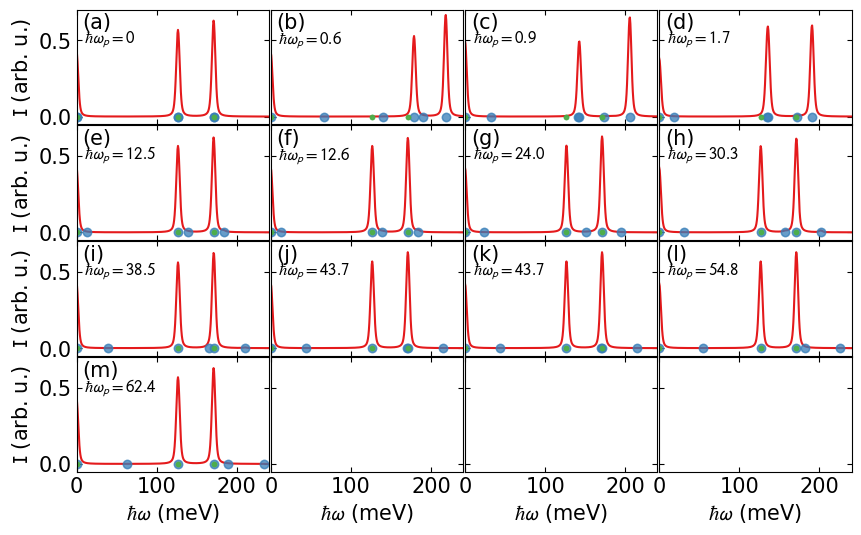

In [9]:
a_z = np.array([[1,0],[0,-1]])/2
a_mu = np.array([[0,1],[0,0]])
a_mu_dag = np.array([[0,0],[1,0]])
Hphon_small = np.dot(a_mu_dag, a_mu) 

III = np.identity(2)
H_cef = np.kron(Ce.H, III)
H_phon1 = np.kron(np.identity(len(Ce.H)),  Hphon_small)

####### Define CEF operators
CEFJx = np.kron(cef.Operator.Jx(Ce.J).O.real, III)
CEFJy = np.kron(cef.Operator.Jy(Ce.J).O.real, III)
CEFJz = np.kron(cef.Operator.Jz(Ce.J).O.real, III)

## Define phonon operators
PHOJp1 = np.kron(np.identity(len(Ce.H)), a_mu)
PHOJm1 = np.kron(np.identity(len(Ce.H)), a_mu_dag)

##################################
#
def CEFtransition(ket1, ket2):
    ax = np.dot(ket1, np.dot(CEFJx, ket2))**2
    ay = np.dot(ket1, np.dot(CEFJy, ket2))**2
    az = np.dot(ket1, np.dot(CEFJz, ket2))**2
    return np.real(ax + ay + az)

def PHOtransition(ket1, ket2):
    ap1 = np.dot(ket1, np.dot(PHOJp1, ket2))**2
    am1 = np.dot(ket1, np.dot(PHOJm1, ket2))**2
    return np.real(ap1 + am1)


#########################################################

## Loop through all phonons and calculate the eigenspectrum

f, ax = plt.subplots(4,4, figsize=(10,6), sharex=True, sharey=True)
axes = ax.flatten()

hbaromega = np.linspace(0,240, 401)
Gwidth, Lwidth = 4, 2


for i,OO in enumerate(PhononOO):
    ## Calculate the eigenspectrum
    H_int = np.kron(OO,  a_mu_dag + a_mu)
    H_phons = H_phon1*PhononEE[i]

    Ev1, Eve1 = np.linalg.eigh(H_cef + H_phons + H_int)
    Eval1 = Ev1 - np.min(Ev1)
    if i == 0: Eval0 = deepcopy(Eval1)
    Evec1 = Eve1.T

    ## Calculate neutron spectrum 
    CEF_neutronIntensity_1 = np.zeros_like(hbaromega)
    for j,ev in enumerate(Eval1):
        ev0 = Evec1[0]
        ev0b = Evec1[1]
        ev1 = Evec1[j]
        intensCF = CEFtransition(ev0, ev1) + CEFtransition(ev0b, ev1)
        #intensPH = PHOtransition(ev0, ev1) + PHOtransition(ev0b, ev1)

        CEF_neutronIntensity_1 += Ce._voigt(hbaromega, ev, Gwidth, Lwidth)*intensCF

    axes[i].plot(hbaromega, CEF_neutronIntensity_1)
    axes[i].plot(Eval1, [0]*len(Eval1), marker='o', ls='none', alpha=0.5)
    axes[i].plot(Eval0, [0]*len(Eval0), marker='.', ls='none', alpha=0.5)
    axes[i].set_xlim(0,np.max(hbaromega))
    axes[i].set_ylim(-0.05,0.7)
    axes[i].text(0.03,0.97, pf.parSubPlotLabel(i), va='top', transform=axes[i].transAxes)
    axes[i].text(0.04,0.83, '$\\hbar \\omega_p = {}$'.format(np.around(PhononEE[i], 1)), 
                 va='top', transform=axes[i].transAxes, fontsize=12)

f.subplots_adjust(wspace=0.01, hspace=0.01)
for i in range(len(ax)):
    ax[i,0].set_ylabel('$\\rm I$ (arb. u.)')
for i,axx in enumerate(ax[-1]):
    axx.set_xlabel('$\\hbar \\omega$ (meV)')


Notes: 

The most stronglyh coupled seem to be (c),(d), (f), (x), (z), (dd)

However, this depends strongly on the level spacing. If a higher harmonic overlaps some with a CEF level, this produces a nonzero splitting.

### Calculate for all Q
4/5/25

In [10]:
## 
nqs = len(dft_eigenvectors['phonon'])
nphons = len(dft_eigenvectors['phonon'][0]['band'])
hbaromega = np.linspace(0,280, 401)
Gwidth, Lwidth = 4, 2

CEF_intens_vs_Q = np.zeros((nqs,nphons, len(hbaromega)))
CEF_E_vs_Q = np.zeros((nqs,nphons))

for qqi in range(nqs):

    for i in range(nphons): # Loop through phonons
        OO1 = KCO_dftcef.PhononOperator(dft_eigenvectors['phonon'][qqi]['band'][i], displacement = 1.0) # 0.1
        Bph1 = CeLig1.B - CeLig0.B
        PhononEE1 = dft_eigenvectors['phonon'][qqi]['band'][i]['frequency'] * THzTomeV
        CEF_E_vs_Q[qqi,i] = PhononEE1

        ## Calculate the eigenspectrum
        H_int = np.kron(OO1,  a_mu_dag + a_mu)
        H_phons = H_phon1*PhononEE1

        Ev1, Eve1 = np.linalg.eigh(H_cef + H_phons + H_int)
        Eval1 = Ev1 - np.min(Ev1)
        if i == 0: Eval0 = deepcopy(Eval1)
        Evec1 = Eve1.T

        ## Calculate neutron spectrum 
        CEF_neutronIntensity_1 = np.zeros_like(hbaromega)
        for j,ev in enumerate(Eval1):
            ev0 = Evec1[0]
            ev0b = Evec1[1]
            ev1 = Evec1[j]
            intensCF = CEFtransition(ev0, ev1) + CEFtransition(ev0b, ev1)
            #intensPH = PHOtransition(ev0, ev1) + PHOtransition(ev0b, ev1)

            CEF_neutronIntensity_1 += Ce._voigt(hbaromega, ev, Gwidth, Lwidth)*intensCF

        CEF_intens_vs_Q[qqi,i] = CEF_neutronIntensity_1

In [11]:
### Compute the x-axis of the phonon dispersion
CEF_QQ = np.zeros((nqs,3))
RecipLatt_M = np.array(dft_eigenvectors['reciprocal_lattice']).T
print(RecipLatt_M)

for qqi in range(nqs):
    qqrlu = dft_eigenvectors['phonon'][qqi]['q-position']
    CEF_QQ[qqi] = np.dot(RecipLatt_M,qqrlu)

dqx = np.linalg.norm(CEF_QQ[1:] - CEF_QQ[:-1], axis=1)
qx = np.array([np.sum(dqx[:i]) for i in range(nqs)])
# print(qx)
qxticks = [qx[i] for i in range(0,nqs,51)] + [qx[-1]]
print(np.around(qxticks,3))

[[ 0.07955781  0.07955781  0.        ]
 [-0.27332783  0.27332783  0.        ]
 [-0.14651995 -0.14651995  0.32016503]]
[0.    0.16  0.262 0.319 0.49  0.571 0.758]


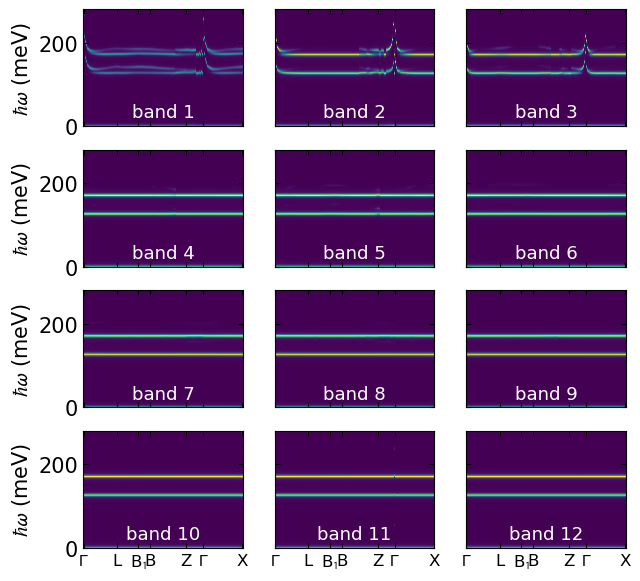

In [12]:
f, ax = plt.subplots(4,3, figsize=(7,7), sharex=True, sharey=True)
axes = ax.flatten()
# qx = np.linspace(0,6,51*6)

for i in range(nphons):
    axes[i].pcolormesh(qx, hbaromega, CEF_intens_vs_Q[:,i,:].T, rasterized=True)
    axes[i].text(0.5,0.04, 'band {}'.format(i+1), ha='center', va='bottom', 
                 transform=axes[i].transAxes, fontsize=13, color='w')

xtlabels = ['$\\Gamma$', 'L', 'B$_1$', 'B', 'Z', '$\\Gamma$', 'X']
for axx in ax[-1]:
    axx.set_xticks(qxticks)
    axx.set_xticklabels(xtlabels,fontsize=12)
for axx in ax[:,0]:
    axx.set_ylabel('$\\hbar \\omega$ (meV)')

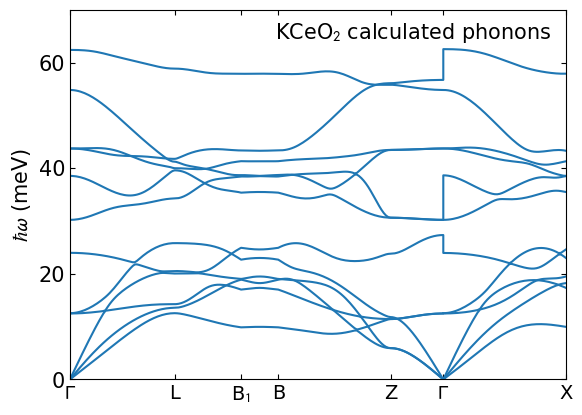

In [13]:
f,ax = plt.subplots()
ax.plot(qx, CEF_E_vs_Q, color=pf.cpal2[0])
ax.set_ylim(0,70)

ax.set_xticks(qxticks)
ax.set_xticklabels(xtlabels,fontsize=14)
ax.set_xlim(0,qx[-1])
ax.set_ylabel('$\\hbar \\omega$ (meV)')
ax.set_yticks(np.arange(0,70,20))

ax.text(0.97,0.97, 'KCeO$_2$ calculated phonons', va='top', ha='right', transform=ax.transAxes)

### Save output
plt.savefig('writeup/PhononBandStructure.pdf', bbox_inches='tight',pad_inches = 0.03)
plt.savefig('writeup/KCeO2_CrystalFields/KCeO2_figs/PhononBandStructure.pdf',
            bbox_inches='tight',pad_inches = 0.03)

### Plot the Q=0 phonon distortion alongside the effect

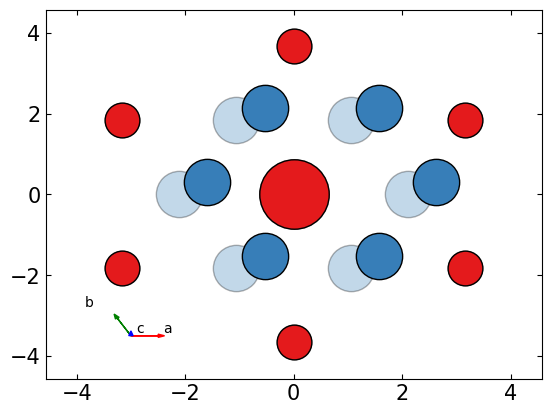

In [14]:

class atomplot:
	def __init__(self, theta, phi, atoms):
		self.theta = theta
		self.phi = phi
		self.plotX = np.array([np.cos(phi), np.sin(phi), 0])
		self.plotY = np.array([-np.sin(phi)*np.cos(theta), np.cos(phi)*np.cos(theta), np.sin(theta)])
		self.plotZ = np.cross(self.plotX, self.plotY)

		self.atoms = atoms
		# print(self.plotX, self.plotY, self.plotZ, np.dot(self.plotX, self.plotY), np.dot(self.plotY, self.plotZ))

	def plotatoms(self, axis, plotlines  = [], colors = plt.cm.Set1(np.arange(8)), sizescale = 100,
			   		zorderoffset=0, **kwargs):
		for i,at in enumerate(self.atoms):
			for aa in at:
				axis.plot(np.dot(aa, self.plotX), np.dot(aa, self.plotY), 
					marker='o', markersize=sizescale/(i+2), mec='k', color=colors[i], 
					zorder= np.dot(aa, self.plotZ) + zorderoffset, **kwargs)

			if i in plotlines:
				for a1 in at:
					dist = np.array(a1)-np.array(self.atoms[0][0])
					for a2 in at:
						vect = np.array(a1)-np.array(a2)
						# print(np.abs(np.dot(vect,  dist)))
						if np.abs(np.dot(vect,  dist)) < np.dot(dist,dist)*1.2:
							axis.plot([np.dot(a1, self.plotX), np.dot(a2, self.plotX)], 
								[ np.dot(a1, self.plotY), np.dot(a2, self.plotY)], 
								color='grey', lw='3', zorder = np.mean([np.dot(a1, self.plotZ), np.dot(a2, self.plotZ)]))

		xvals = [np.dot(a, self.plotX) for a in at for at in self.atoms]
		yvals = [np.dot(a, self.plotY) for a in at for at in self.atoms]
		axis.set_xlim(np.min(xvals+yvals)*1.25, np.max(xvals+yvals)*1.25)
		axis.set_ylim(np.min(xvals+yvals)*1.25, np.max(xvals+yvals)*1.25)

	def plotaxes(self, X, Y, Z):
		# X = np.array([1,0,0])
		# Y = np.array([0,1,0])
		# Z = np.array([0,0,1])
		arrowatributes = {'head_width':0.06, 'overhang':0.1, 'color':'k'}

		plt.arrow(0,0, *self._flatten(X/2), **arrowatributes)
		plt.arrow(0,0, *self._flatten(Y/2), **arrowatributes)
		plt.arrow(0,0, *self._flatten(Z/2), **arrowatributes)

		disp = np.array([0.07,0.07])
		plt.text(*self._flatten(X/2)+disp, 'X')
		plt.text(*self._flatten(Y/2)+disp, 'Y')
		plt.text(*self._flatten(Z/2)+disp, 'Z')


	def plotabc(self, axis, center=[0,0], fontsize=13):
		X = np.array([1,0,0])
		Y = np.array([-0.5,np.sqrt(3)/2,0])
		Z = np.array([0,0,1])
		arrowatributes = {'head_width':0.08, 'overhang':0.1}

		axis.arrow(center[0],center[1], *self._flatten(X/2), color='r', **arrowatributes)
		axis.arrow(center[0],center[1], *self._flatten(Y/2), color='g', **arrowatributes)
		axis.arrow(center[0],center[1], *self._flatten(Z/2), color='b', **arrowatributes)

		disp = np.array([0.09,0.09]) + np.array(center)
		axis.text(*self._flatten(X/2)+disp, 'a', fontsize=fontsize)
		axis.text(*self._flatten(Y/2)+disp- np.array([0.7,-0.2]), 'b', fontsize=fontsize)
		axis.text(*self._flatten(Z/2)+disp, 'c', fontsize=fontsize)


	def _flatten(self, vect):
		return np.dot(vect, self.plotX), np.dot(vect, self.plotY)
	


########################################################################################
########################################################################################
########################################################################################


qqi = 2
i = 1
OO1 = KCO_dftcef.PhononOperator(dft_eigenvectors['phonon'][qqi]['band'][i], displacement = 1.0)
atomlist0 = [[[0,0,0]], CeLig0.bonds[:6], CeLig0.bonds[6:]]
atomlist1 = [[[0,0,0]], CeLig1.bonds[:6], CeLig1.bonds[6:]]
atcols = [pf.cpal1[0], pf.cpal1[1], pf.cpal1[0]]

f,ax = plt.subplots()
plotobj0 = atomplot(0.0, 0.0, atomlist0)
plotobj0.plotatoms(ax, alpha=0.3, zorderoffset=-1, colors=atcols)
plotobj1 = atomplot(0.0, 0.0, atomlist1)
plotobj1.plotatoms(ax, colors=atcols)
plotobj1.plotabc(ax, [-3,-3.5], fontsize=10)

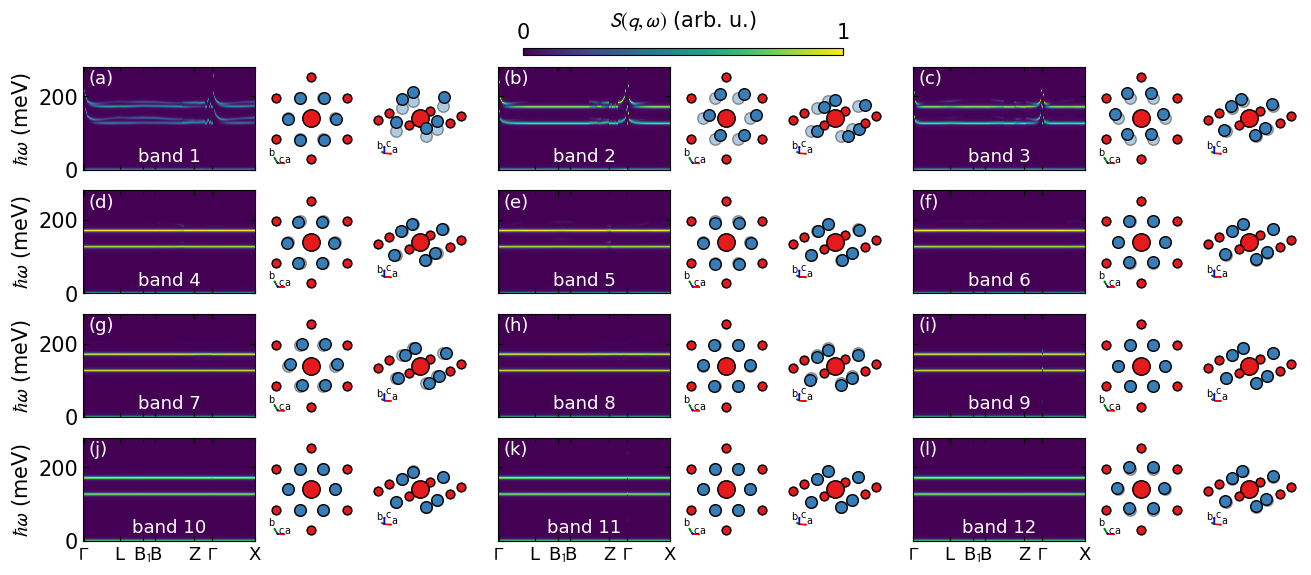

In [15]:
# f, ax = plt.subplots(6*2,6, figsize=(14,9*2))
# axes0 = ax[:,::2].flatten()
# axes1 = ax[:,1::2].flatten()

fig = plt.figure(figsize=(16,6))
nrow=4
ncol=3
gs0 = gridspec.GridSpec(nrow, ncol*4, figure=fig, width_ratios=[1,0.6,0.6,0.1]*ncol, wspace=0.05)

axes0 = np.hstack([fig.add_subplot(gs0[i,j*4]) for i in range(nrow) for j in range(ncol)])
axes1 = np.hstack([fig.add_subplot(gs0[i,j*4+1]) for i in range(nrow) for j in range(ncol)])
axes2 = np.hstack([fig.add_subplot(gs0[i,j*4+2]) for i in range(nrow) for j in range(ncol)])



for i in range(nphons):
    axes0[i].pcolormesh(qx, hbaromega, CEF_intens_vs_Q[:,i,:].T, rasterized=True)
    axes0[i].text(0.5,0.04, 'band {}'.format(i+1), ha='center', va='bottom', 
                  transform=axes0[i].transAxes, fontsize=13, color='w')

    axes0[i].text(0.03,0.97, pf.parSubPlotLabel(i), va='top', transform=axes0[i].transAxes, 
                  fontsize=13, color='w')
    # axes0[i].text(0.04,0.83, '$\\hbar \\omega_p = {}$'.format(np.around(PhononEE[i], 1)), 
    #              va='top', transform=axes0[i].transAxes, fontsize=10)

    ################### Plot the distortions ##############################
    qqi = 2
    OO1 = KCO_dftcef.PhononOperator(dft_eigenvectors['phonon'][qqi]['band'][i], displacement = 1.0)
    atomlist0 = [[[0,0,0]], CeLig0.bonds[:6], CeLig0.bonds[6:]]
    atomlist1 = [[[0,0,0]], CeLig1.bonds[:6], CeLig1.bonds[6:]]

    atplotprops = dict(colors=atcols, sizescale=25)
    plotobj0 = atomplot(0.0, 0.0, atomlist0)
    plotobj0.plotatoms(axes1[i], alpha=0.4, zorderoffset=-1, **atplotprops)
    plotobj1 = atomplot(0.0, 0.0, atomlist1)
    plotobj1.plotatoms(axes1[i], **atplotprops)
    plotobj1.plotabc(axes1[i], [-3,-4], fontsize=7)
    axes1[i].axis('off')
    ## Replot at different angle
    plotobj0 = atomplot(1.4, 0.25, atomlist0)
    plotobj0.plotatoms(axes2[i], alpha=0.4, zorderoffset=-1, **atplotprops)
    plotobj1 = atomplot(1.4, 0.25, atomlist1)
    plotobj1.plotatoms(axes2[i], **atplotprops)
    plotobj1.plotabc(axes2[i], [-3,-3.], fontsize=7)
    axes2[i].axis('off')
    ###############################################################################

    if i<(nphons - ncol):
        axes0[i].tick_params(labelbottom=False)
    if i%ncol != 0 :
        axes0[i].tick_params(labelleft=False)
    else:
        axes0[i].set_ylabel('$\\hbar \\omega$ (meV)')
    axes0[i].set_xticks(qxticks)

for axx in axes0[-ncol:]:
    axx.set_xticklabels(xtlabels,fontsize=13)
# for axx in ax[:,0]:
#     axx.

fig.subplots_adjust(top=0.9)
### Add colorbar
cax2 = fig.add_axes([0.4,0.92,0.2,0.012])
Dnorm = Normalize(vmin = 0, vmax = 1)
mappable2 = plt.cm.ScalarMappable(norm=Dnorm, cmap='viridis')
# mappable2.set_array([])
cbar2 = plt.colorbar(mappable2, orientation='horizontal', cax = cax2, norm=Dnorm, ticks=[0,1])
cbar2.set_label('$S(q,\\omega)$ (arb. u.)', labelpad=-3)
cbar2.ax.xaxis.set_ticks_position('top')
cbar2.ax.xaxis.set_label_position('top')

## Save output
plt.savefig('writeup/PhononsCEF_intensities_exhaustive.pdf', bbox_inches='tight',pad_inches = 0.03)
plt.savefig('writeup/KCeO2_CrystalFields/KCeO2_figs/PhononsCEF_intensities_exhaustive.pdf',
            bbox_inches='tight',pad_inches = 0.03)

### So why does the in-plane shift of the ligand cage split the CEF so dramatically?

In [16]:
## Make a table
qqi = 2 # 51*5-10 # 112
# qqi = 51*3-10 # 112

### print header
Blabels = ['$B_{}^{}$'.format(n,m) for n in range(2,6,2) for m in range(0,n+1)]
print('Band  &  $\\hbar \\omega_{phonon}$ (meV)  & ', ' & '.join(Blabels), '\\\\')
print('\\hline')

for i in range(nphons):
    pEE  = dft_eigenvectors['phonon'][qqi]['band'][i]['frequency'] * THzTomeV
    OO1 = KCO_dftcef.PhononOperator(dft_eigenvectors['phonon'][qqi]['band'][i], displacement = 1.0)
    Bph1 = CeLig1.B - CeLig0.B

    print(i+1,' & ',np.around(pEE,2), ' & ', ' & '.join([str(np.around(v,6)) for v in Bph1[:len(Blabels)]]), '\\\\')



Band  &  $\hbar \omega_{phonon}$ (meV)  &  $B_2^0$ & $B_2^1$ & $B_2^2$ & $B_4^0$ & $B_4^1$ & $B_4^2$ & $B_4^3$ & $B_4^4$ \\
\hline
1  &  0.62  &  -0.86356 & -0.655678 & -0.485606 & 0.116055 & -0.019869 & -0.025409 & -2.181088 & -0.025966 \\
2  &  0.95  &  -0.765146 & -3.879517 & -0.132704 & 0.008894 & 0.071082 & -0.041184 & -1.576603 & 0.090931 \\
3  &  1.66  &  -0.435758 & 2.497297 & 0.328281 & 0.004841 & -0.029888 & 0.023324 & -0.895509 & -0.047835 \\
4  &  12.5  &  -0.030139 & -0.156557 & -0.006892 & 0.000289 & 0.002671 & -0.001172 & -0.06265 & 0.004565 \\
5  &  12.6  &  -0.036535 & 0.190866 & 0.009624 & 0.000351 & -0.003194 & 0.001425 & -0.07593 & -0.005476 \\
6  &  23.97  &  -0.000437 & 0.00467 & 0.00197 & 5.1e-05 & 6.7e-05 & 0.000106 & -0.001437 & 4.1e-05 \\
7  &  30.26  &  -0.088487 & -0.458557 & -0.019746 & 0.000863 & 0.007868 & -0.003549 & -0.183693 & 0.013155 \\
8  &  38.51  &  -0.021847 & -0.065706 & -0.0472 & 0.009678 & -0.002506 & -0.002304 & -0.148166 & -0.002539 \\
9  & 

In [17]:
qqi = 51*3-10
i = 4
print(KCO_dftcef.Lig.bonds)
print(KCO_dftcef.computedistortion(dft_eigenvectors['phonon'][qqi]['band'][i]))

[[ 2.11229947  0.          1.18845591]
 [-2.11229947  0.         -1.18845591]
 [ 1.05614973 -1.829305   -1.18845591]
 [ 1.05614973  1.829305   -1.18845591]
 [-1.05614973 -1.829305    1.18845591]
 [-1.05614973  1.829305    1.18845591]
 [ 3.1684492   1.829305    0.        ]
 [-3.1684492  -1.829305    0.        ]
 [ 3.1684492  -1.829305    0.        ]
 [-3.1684492   1.829305    0.        ]
 [ 0.         -3.65861     0.        ]
 [ 0.          3.65861     0.        ]]
[[ 2.18285565  0.19122327  1.19918254]
 [-2.04174328  0.19122327 -1.17772928]
 [ 1.12670592 -1.63808173 -1.17772928]
 [ 1.12670592  2.02052827 -1.17772928]
 [-0.98559355 -1.63808173  1.19918254]
 [-0.98559355  2.02052827  1.19918254]
 [ 3.1684492   1.829305    0.        ]
 [-3.1684492  -1.829305    0.        ]
 [ 3.1684492  -1.829305    0.        ]
 [-3.1684492   1.829305    0.        ]
 [ 0.         -3.65861     0.        ]
 [ 0.          3.65861     0.        ]]


In [18]:
## Dividing by \sqrt(mass) in the Q=0 phonon mode gives uniform displacement! So we should definitely divide by \sqrt(mass). 
qqi = 0
i = 0
evs = np.array(dft_eigenvectors['phonon'][qqi]['band'][i]['eigenvector'])[:,:,0]
print(np.linalg.norm(evs[0]) / np.sqrt(140.116))
print(np.linalg.norm(evs[1]) / np.sqrt(39.0983))
print(np.linalg.norm(evs[2]) / np.sqrt(15.9994))
print(np.linalg.norm(evs[3]) / np.sqrt(15.9994))

0.06880810081700917
0.06880810081700893
0.06880810081700875
0.06880810081700875


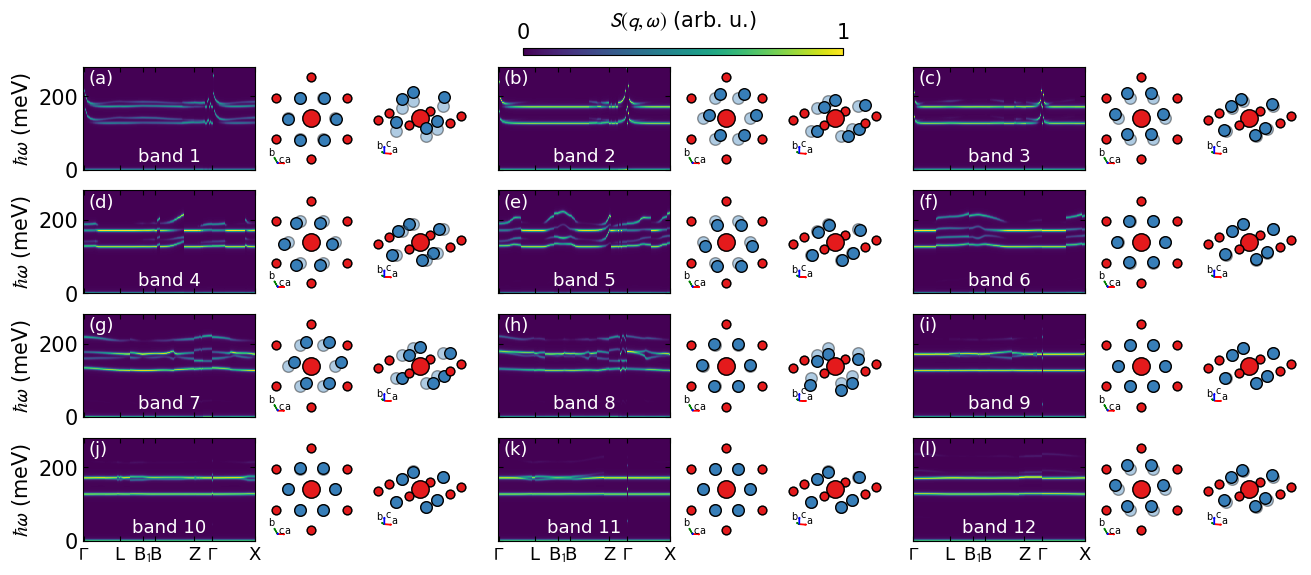

In [19]:
#### Make another plot with 3x the distortion
displacement = 3.0

nqs = len(dft_eigenvectors['phonon'])
nphons = len(dft_eigenvectors['phonon'][0]['band'])
hbaromega = np.linspace(0,280, 401)
Gwidth, Lwidth = 4, 2

CEF_intens_vs_Q = np.zeros((nqs,nphons, len(hbaromega)))
CEF_E_vs_Q = np.zeros((nqs,nphons))

for qqi in range(nqs):

    for i in range(nphons): # Loop through phonons
        if i >2: ddisp = displacement
        else: ddisp=1
        OO1 = KCO_dftcef.PhononOperator(dft_eigenvectors['phonon'][qqi]['band'][i], 
                                        displacement = ddisp) # 0.1
        Bph1 = CeLig1.B - CeLig0.B
        PhononEE1 = dft_eigenvectors['phonon'][qqi]['band'][i]['frequency'] * THzTomeV
        CEF_E_vs_Q[qqi,i] = PhononEE1

        ## Calculate the eigenspectrum
        H_int = np.kron(OO1,  a_mu_dag + a_mu)
        H_phons = H_phon1*PhononEE1

        Ev1, Eve1 = np.linalg.eigh(H_cef + H_phons + H_int)
        Eval1 = Ev1 - np.min(Ev1)
        if i == 0: Eval0 = deepcopy(Eval1)
        Evec1 = Eve1.T

        ## Calculate neutron spectrum 
        CEF_neutronIntensity_1 = np.zeros_like(hbaromega)
        for j,ev in enumerate(Eval1):
            ev0 = Evec1[0]
            ev0b = Evec1[1]
            ev1 = Evec1[j]
            intensCF = CEFtransition(ev0, ev1) + CEFtransition(ev0b, ev1)
            #intensPH = PHOtransition(ev0, ev1) + PHOtransition(ev0b, ev1)

            CEF_neutronIntensity_1 += Ce._voigt(hbaromega, ev, Gwidth, Lwidth)*intensCF

        CEF_intens_vs_Q[qqi,i] = CEF_neutronIntensity_1

##############################################################
hbaromega = np.linspace(0,280, 401)
Gwidth, Lwidth = 4, 2

fig = plt.figure(figsize=(16,6))
nrow=4
ncol=3
gs0 = gridspec.GridSpec(nrow, ncol*4, figure=fig, width_ratios=[1,0.6,0.6,0.1]*ncol, wspace=0.05)

axes0 = np.hstack([fig.add_subplot(gs0[i,j*4]) for i in range(nrow) for j in range(ncol)])
axes1 = np.hstack([fig.add_subplot(gs0[i,j*4+1]) for i in range(nrow) for j in range(ncol)])
axes2 = np.hstack([fig.add_subplot(gs0[i,j*4+2]) for i in range(nrow) for j in range(ncol)])



for i in range(nphons):
    if i >2: ddisp = displacement
    else: ddisp=1
    axes0[i].pcolormesh(qx, hbaromega, CEF_intens_vs_Q[:,i,:].T, rasterized=True)
    axes0[i].text(0.5,0.04, 'band {}'.format(i+1), ha='center', va='bottom', 
                  transform=axes0[i].transAxes, fontsize=13, color='w')

    axes0[i].text(0.03,0.97, pf.parSubPlotLabel(i), va='top', transform=axes0[i].transAxes, 
                  fontsize=13, color='w')
    # axes0[i].text(0.04,0.83, '$\\hbar \\omega_p = {}$'.format(np.around(PhononEE[i], 1)), 
    #              va='top', transform=axes0[i].transAxes, fontsize=10)

    ################### Plot the distortions ##############################
    qqi = 2
    OO1 = KCO_dftcef.PhononOperator(dft_eigenvectors['phonon'][qqi]['band'][i], 
                                    displacement = ddisp)
    atomlist0 = [[[0,0,0]], CeLig0.bonds[:6], CeLig0.bonds[6:]]
    atomlist1 = [[[0,0,0]], CeLig1.bonds[:6], CeLig1.bonds[6:]]

    atplotprops = dict(colors=atcols, sizescale=25)
    plotobj0 = atomplot(0.0, 0.0, atomlist0)
    plotobj0.plotatoms(axes1[i], alpha=0.4, zorderoffset=-1, **atplotprops)
    plotobj1 = atomplot(0.0, 0.0, atomlist1)
    plotobj1.plotatoms(axes1[i], **atplotprops)
    plotobj1.plotabc(axes1[i], [-3,-4], fontsize=7)
    axes1[i].axis('off')
    ## Replot at different angle
    plotobj0 = atomplot(1.4, 0.25, atomlist0)
    plotobj0.plotatoms(axes2[i], alpha=0.4, zorderoffset=-1, **atplotprops)
    plotobj1 = atomplot(1.4, 0.25, atomlist1)
    plotobj1.plotatoms(axes2[i], **atplotprops)
    plotobj1.plotabc(axes2[i], [-3,-3.], fontsize=7)
    axes2[i].axis('off')
    ###############################################################################

    if i<(nphons - ncol):
        axes0[i].tick_params(labelbottom=False)
    if i%ncol != 0 :
        axes0[i].tick_params(labelleft=False)
    else:
        axes0[i].set_ylabel('$\\hbar \\omega$ (meV)')
    axes0[i].set_xticks(qxticks)

for axx in axes0[-ncol:]:
    axx.set_xticklabels(xtlabels,fontsize=13)
# for axx in ax[:,0]:
#     axx.

fig.subplots_adjust(top=0.9)
### Add colorbar
cax2 = fig.add_axes([0.4,0.92,0.2,0.012])
Dnorm = Normalize(vmin = 0, vmax = 1)
mappable2 = plt.cm.ScalarMappable(norm=Dnorm, cmap='viridis')
# mappable2.set_array([])
cbar2 = plt.colorbar(mappable2, orientation='horizontal', cax = cax2, norm=Dnorm, ticks=[0,1])
cbar2.set_label('$S(q,\\omega)$ (arb. u.)', labelpad=-3)
cbar2.ax.xaxis.set_ticks_position('top')
cbar2.ax.xaxis.set_label_position('top')

## Save output
plt.savefig('writeup/PhononsCEF_intensities_exhaustive2.pdf', bbox_inches='tight',pad_inches = 0.03)
plt.savefig('writeup/KCeO2_CrystalFields/KCeO2_figs/PhononsCEF_intensities_exhaustive2.pdf',
            bbox_inches='tight',pad_inches = 0.03)

In [20]:
## Make a table
qqi = 2 # 51*5-10 # 112
# qqi = 51*3-10 # 112

### print header
Blabels = ['$B_{}^{}$'.format(n,m) for n in range(2,6,2) for m in range(0,n+1)]
print('Band  &  $\\hbar \\omega_{phonon}$ (meV)  & ', ' & '.join(Blabels), '\\\\')
print('\\hline')

for i in range(nphons):
    pEE  = dft_eigenvectors['phonon'][qqi]['band'][i]['frequency'] * THzTomeV
    OO1 = KCO_dftcef.PhononOperator(dft_eigenvectors['phonon'][qqi]['band'][i], displacement = 3.0)
    Bph1 = CeLig1.B - CeLig0.B

    print(i+1,' & ',np.around(pEE,2), ' & ', ' & '.join([str(np.around(v,6)) for v in Bph1[:len(Blabels)]]), '\\\\')



Band  &  $\hbar \omega_{phonon}$ (meV)  &  $B_2^0$ & $B_2^1$ & $B_2^2$ & $B_4^0$ & $B_4^1$ & $B_4^2$ & $B_4^3$ & $B_4^4$ \\
\hline
1  &  0.62  &  -22.120211 & -3.995187 & -1.300151 & 0.104792 & -0.041796 & 0.017506 & -9.868925 & -0.095494 \\
2  &  0.95  &  -2.751859 & -20.364184 & -3.326117 & 0.098785 & 0.442707 & -0.442928 & -9.086257 & 0.065405 \\
3  &  1.66  &  -3.954439 & 15.364462 & 3.584138 & 0.076431 & -0.304765 & 0.094928 & -6.226998 & -0.057675 \\
4  &  12.5  &  -0.269984 & -1.389464 & -0.055962 & 0.002766 & 0.024275 & -0.011846 & -0.558529 & 0.037847 \\
5  &  12.6  &  -0.327578 & 1.669838 & 0.102463 & 0.003409 & -0.02933 & 0.011587 & -0.674676 & -0.04449 \\
6  &  23.97  &  -0.003933 & 0.042001 & 0.017724 & 0.00046 & 0.0006 & 0.000952 & -0.012927 & 0.000368 \\
7  &  30.26  &  -0.780466 & -3.955734 & -0.134713 & 0.009107 & 0.072583 & -0.042245 & -1.608173 & 0.092264 \\
8  &  38.51  &  -0.380171 & -0.540642 & -0.400416 & 0.076294 & -0.018511 & -0.020589 & -1.313854 & -0.021753 \

## Make a representative plot

In [21]:
## Pick out the momentum and phonon
qqi = 2
i = 7

OO1 = KCO_dftcef.PhononOperator(dft_eigenvectors['phonon'][qqi]['band'][i], displacement = 3.0)
Bph1 = CeLig1.B - CeLig0.B
PhononEE1 = dft_eigenvectors['phonon'][qqi]['band'][i]['frequency'] * THzTomeV

## Calculate the eigenspectrum
H_int = np.kron(OO1,  a_mu_dag + a_mu)
H_phons = H_phon1*PhononEE1

Ev1, Eve1 = np.linalg.eigh(H_cef + H_phons + H_int)
Eval1 = Ev1 - np.min(Ev1)
Evec1 = Eve1.T

Ev0, Eve0 = np.linalg.eigh(H_cef + H_phons)
Eval0 = Ev0 - np.min(Ev0)
Evec0 = Eve0.T

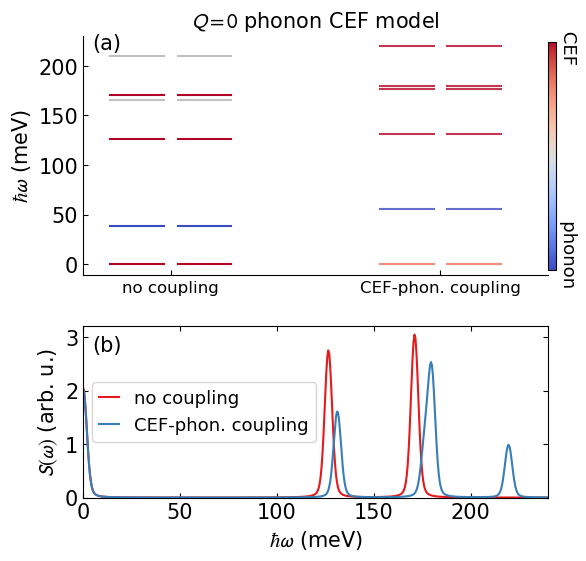

In [22]:
## Make a representative plot 

cmap= plt.cm.coolwarm

hbaromega = np.linspace(0,250, 501)
CEF_neutronIntensity_0 = np.zeros_like(hbaromega)
CEF_neutronIntensity_1 = np.zeros_like(hbaromega)
Gwidth, Lwidth = 4, 1

#################################################

f = plt.figure(figsize=(6, 6))
outer = gridspec.GridSpec(2, 1, height_ratios = [1.4, 1], hspace=0.25) 

ax1 = f.add_subplot(outer[0])
ax2 = f.add_subplot(outer[1])
plotthreshold = 0.1  ## Put the CEF line on the spectrum if its intensity is above this

## Calculate un-coupled eigenspectrum
lastev, xv = 0, -1
for i,ev in enumerate(Eval0):
    ev0 = Evec0[0]
    ev0b = Evec0[1]
    ev1 = Evec0[i]
    intensCF = CEFtransition(ev0, ev1) + CEFtransition(ev0b, ev1)
    intensPH = PHOtransition(ev0, ev1) + PHOtransition(ev0b, ev1)
    colval = (intensCF)/(intensCF+intensPH)
    # print(colval, ev)
    colr = cmap(colval)

    if ev-lastev < 1e-7:
        xv += 1
    else:
        xv = 0
        lastev = deepcopy(ev)
    if (intensCF+intensPH) > plotthreshold:
        ax1.plot([xv, xv+0.8], [ev]*2, color=colr)
    else:
        ax1.plot([xv, xv+0.8], [ev]*2, color='grey', alpha=0.5)

    CEF_neutronIntensity_0 += Ce._voigt(hbaromega, ev, Gwidth, Lwidth)*intensCF

## Calculate coupled eigenspectrum
lastev, xv = 0, 3
for i,ev in enumerate(Eval1):
    ev0 = Evec1[0]
    ev0b = Evec1[1]
    ev1 = Evec1[i]
    intensCF = CEFtransition(ev0, ev1) + CEFtransition(ev0b, ev1)
    intensPH = PHOtransition(ev0, ev1) + PHOtransition(ev0b, ev1)
    colval = (intensCF)/(intensCF+intensPH)
    colr = cmap(colval)
    
    if (intensCF+intensPH) > plotthreshold:
        if ev-lastev < 1e-7:
            xv += 1
        else:
            xv = 4
            lastev = deepcopy(ev)
        ax1.plot([xv, xv+0.8], [ev]*2, color=colr, alpha=0.8)
    else:
        ax1.plot([xv, xv+0.8], [ev]*2, color='grey', alpha=0.5)

    CEF_neutronIntensity_1 += Ce._voigt(hbaromega, ev, Gwidth, Lwidth)*intensCF

####################################################


labelz = ['no coupling', 'CEF-phon. coupling']

ax2.plot(hbaromega, CEF_neutronIntensity_0*4, label=labelz[0])
ax2.plot(hbaromega, CEF_neutronIntensity_1*4, label=labelz[1])
ax2.legend(fontsize=13, handlelength=1.1, loc=6)

ax1.text(0.02,1.01, pf.parSubPlotLabel(0), va='top', transform=ax1.transAxes)
ax2.text(0.02,0.95, pf.parSubPlotLabel(1), va='top', transform=ax2.transAxes)

ax1.set_ylabel('$\\hbar \\omega$ (meV)')
ax1.set_xticks([0.9, 4.9])
ax1.set_xticklabels(labelz, fontsize=12)
ax1.set_xlim(-0.4,6.5)
ax1.spines[['right', 'top']].set_visible(False)
ax1.tick_params(top=False, right=False)

ax2.set_xlabel('$\\hbar \\omega$ (meV)')
ax2.set_xlim(0,240)
ax2.set_ylim(0,)
ax2.set_ylabel('$S(\\omega)$ (arb. u.)')

ax1.set_title('$Q=0$ phonon CEF model', fontsize=15)

norm =Normalize(0,1)
cax1 = f.add_axes([0.9,0.49,0.013,0.38])
mappable = plt.cm.ScalarMappable(cmap=cmap, norm = norm)
mappable.set_array([])
cbar = f.colorbar(mappable, cax = cax1, norm=norm, ticks=[])
cbar.set_label(' CEF' + ' '*27 + 'phonon', labelpad=15, fontsize=13, rotation=-90)

### Try 2 at the figure

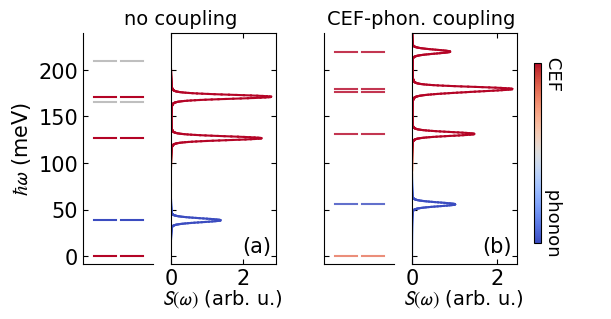

In [23]:

hbaromega = np.linspace(-20,250, 1001)
CEF_neutronIntensity_0 = np.zeros_like(hbaromega)
CEF_neutronIntensity_1 = np.zeros_like(hbaromega)
PHO_neutronIntensity_0 = np.zeros_like(hbaromega)
PHO_neutronIntensity_1 = np.zeros_like(hbaromega)
Gwidth, Lwidth = 4.5, 1

#################################################

f = plt.figure(figsize=(5.6, 3))
outer = gridspec.GridSpec(1, 2, wspace=0.25) 
gs1 = gridspec.GridSpecFromSubplotSpec(1,2,outer[0], wspace=0.2, width_ratios=[1,1.5])
gs2 = gridspec.GridSpecFromSubplotSpec(1,2,outer[1], wspace=0.2, width_ratios=[1,1.5])

ax1 = [f.add_subplot(gs1[i]) for i in range(2)]
ax2 = [f.add_subplot(gs2[i]) for i in range(2)]
plotthreshold = 0.1  ## Put the CEF line on the spectrum if its intensity is above this


## Calculate un-coupled eigenspectrum
lastev, xv = 0, -1
for i,ev in enumerate(Eval0):
    ev0 = Evec0[0]
    ev0b = Evec0[1]
    ev1 = Evec0[i]
    intensCF = CEFtransition(ev0, ev1) + CEFtransition(ev0b, ev1)
    intensPH = PHOtransition(ev0, ev1) + PHOtransition(ev0b, ev1)
    colval = (intensCF)/(intensCF+intensPH)
    # print(colval, ev)
    colr = cmap(colval)

    if ev-lastev < 1e-7:
        xv += 1
    else:
        xv = 0
        lastev = deepcopy(ev)
    if (intensCF+intensPH) > plotthreshold:
        ax1[0].plot([xv, xv+0.8], [ev]*2, color=colr)
    else:
        ax1[0].plot([xv, xv+0.8], [ev]*2, color='grey', alpha=0.5)

    if ev > 0.1:
        CEF_neutronIntensity_0 += Ce._voigt(hbaromega, ev, Gwidth, Lwidth)*intensCF
        PHO_neutronIntensity_0 += Ce._voigt(hbaromega, ev, Gwidth, Lwidth)*intensPH

## Calculate coupled eigenspectrum
lastev, xv = 0, -1
for i,ev in enumerate(Eval1):
    ev0 = Evec1[0]
    ev0b = Evec1[1]
    ev1 = Evec1[i]
    intensCF = CEFtransition(ev0, ev1) + CEFtransition(ev0b, ev1)
    intensPH = PHOtransition(ev0, ev1) + PHOtransition(ev0b, ev1)
    colval = (intensCF)/(intensCF+intensPH)
    colr = cmap(colval)
    
    if ev-lastev < 1e-7:
        xv += 1
    else:
        xv = 0
        lastev = deepcopy(ev)
    if (intensCF+intensPH) > plotthreshold:
        ax2[0].plot([xv, xv+0.8], [ev]*2, color=colr, alpha=0.8)
    else:
        ax2[0].plot([xv, xv+0.8], [ev]*2, color='grey', alpha=0.5)

    if ev > 0.1:
        CEF_neutronIntensity_1 += Ce._voigt(hbaromega, ev, Gwidth, Lwidth)*intensCF
        PHO_neutronIntensity_1 += Ce._voigt(hbaromega, ev, Gwidth, Lwidth)*intensPH

TotIntens_1 = CEF_neutronIntensity_1 + PHO_neutronIntensity_1
TotIntens_0 = CEF_neutronIntensity_0 + PHO_neutronIntensity_0
TotFrac_0 = (CEF_neutronIntensity_0)/TotIntens_0
TotFrac_1 = (CEF_neutronIntensity_1)/TotIntens_1

####################################################


labelz = ['no coupling', 'CEF-phon. coupling']

def colormap_lineplot(axes, x,y,c, cmap, **kwargs):
    for i in range(len(x)-1):
        axes.plot(x[i:i+2], y[i:i+2], color = plt.get_cmap(cmap)(c[i]), **kwargs)

## Plot a color-dependent scatter plot
colormap_lineplot(ax1[1], TotIntens_0*4, hbaromega, TotFrac_0, cmap=cmap)
colormap_lineplot(ax2[1], TotIntens_1*4, hbaromega, TotFrac_1, cmap=cmap)
# ax1[1].scatter(np.interp(hw_interp, hbaromega, TotIntens_0)*4, hw_interp, 
#                c= np.interp(hw_interp, hbaromega, TotFrac_0), cmap=cmap, marker='.', s=0.8)
# ax2[1].scatter(np.interp(hw_interp, hbaromega, TotIntens_1)*4, hw_interp, 
#                c= np.interp(hw_interp, hbaromega, TotFrac_1), cmap=cmap, marker='.', s=0.8)

for i,axx in enumerate([ax1,ax2]):
    axx[0].spines[['right', 'top']].set_visible(False)
    axx[0].tick_params(top=False, right=False, bottom=False, labelbottom=False)
    for j in range(len(axx)):
        axx[j].set_ylim(-8,240)
    axx[1].tick_params(labelleft=False)
    axx[0].set_xlim(-0.4,2.2)
    axx[1].set_xticks([0,2])
    axx[1].set_xlim(0,)
    axx[1].set_xlabel('$S(\\omega)$ (arb. u.) ', labelpad=-1, fontsize=14)

    axx[1].set_title(labelz[i] + ' '*14, fontsize=14)
    axx[1].text(0.95,0.03, pf.parSubPlotLabel(i), va='bottom', ha='right', 
                transform=axx[1].transAxes)

ax1[0].set_ylabel('$\\hbar \\omega$ (meV)')
ax2[0].tick_params(labelleft=False)

# ax2[1].set_title(labelz[1] + ' '*6, fontsize=14)

##############################

norm =Normalize(0,1)
cax1 = f.add_axes([0.93,0.18,0.013,0.6])
mappable = plt.cm.ScalarMappable(cmap=cmap, norm = norm)
mappable.set_array([])
cbar = f.colorbar(mappable, cax = cax1, norm=norm, ticks=[])
cbar.set_label(' CEF' + ' '*17 + 'phonon', labelpad=15, fontsize=13, rotation=-90)

plt.savefig('writeup/PhononsCEF_ExamplePlot.pdf', bbox_inches='tight',pad_inches = 0.03)
plt.savefig('writeup/KCeO2_CrystalFields/KCeO2_figs/PhononsCEF_ExamplePlot.pdf', 
            bbox_inches='tight',pad_inches = 0.03)